# Ridge

- Author: Wen Xin
- Description: This file means that I use ridge as model.

### Explore 原始data

In [172]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [173]:
train=pd.read_csv('train_transfer.csv')
test=pd.read_csv('test_transfer.csv')

In [174]:
features=['last_order',
 'active_days',
 'w7_total_orders',
 'log_total_orders',
 'order_sd',
 'lastgap',
 'avg_gap',
 'log_order_sd',
 'w6_total_orders',
 'min_gap',
 'log_last_order',
 'log_active_days',
 'w7_avg_couponworth',
 'log_lastgap',
 'log_min_gap',
 'log_w7_total_orders',
 'order_nums',
 'w7_max_couponworth',
 'log_w7_max_couponworth',
 'dummy_log_lastgap',
 'w5_total_orders',
 'log_avg_gap',
 'log_w6_total_orders',
 'lastgap_na',
 'log_order_nums',
 'max_gap',
 'send2update_time_min',
 'update2create_time_min',
 'kitchen_royalty',
 'dummy_log_avg_gap',
 'min_gap_na',
 'log_send2update_time_min',
 'avg_gap_na',
 'dummy_log_min_gap',
 'log_w5_total_orders',
 'app_version_b',
 'log_w7_avg_couponworth',
 'w6_max_couponworth',
 'dummy_log_max_gap',
 'w6_avg_couponworth',
 'log_w6_max_couponworth',
 'log_max_gap',
 'max_gap_na',
 'w4_total_orders',
 'w5_max_couponworth',
 'w5_avg_couponworth',
 'log_overall_time_min',
 'overall_time_min',
 'log_update2create_time_min',
 'w3_total_orders',
 'comment_perc',
 'w4_max_couponworth',
 'w4_avg_couponworth',
 'log_w5_max_couponworth',
 'log_w4_total_orders',
 'log_w6_avg_couponworth',
 'log_w4_max_couponworth',
 'overall_time_max',
 'w2_total_orders',
 'w3_max_couponworth',
 'w1_total_orders',
 'log_w5_avg_couponworth',
 'log_w3_total_orders',
 'age',
 'accountLength',
 'log_w2_total_orders',
 'w3_avg_couponworth',
 'log_w4_avg_couponworth',
 'log_w3_max_couponworth',
 'first_order',
 'log_w1_total_orders',
 'w2_max_couponworth',
 'label',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'cluster']

In [175]:
train=train[features]
test=test[features]

### Build Model

In [176]:
y_train=train['label']
X_train=train.drop(['label'],axis=1)
y_test=test['label']
X_test=test.drop(['label'],axis=1)

In [177]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier

In [178]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [179]:
train_predict=ridge.predict(X_train)
test_predict=ridge.predict(X_test)

### Metric & Evaluation

In [180]:
from sklearn import metrics

In [181]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(y_test,test_predict)

Text(0.5,1,'ROC curve')

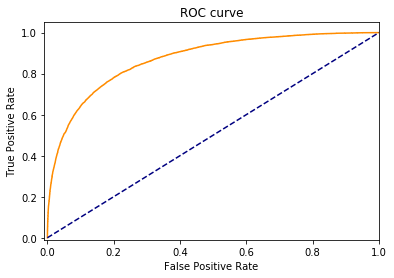

In [182]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [183]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,train_predict)

0.8728280895208402

In [184]:
roc_auc_score(y_test,test_predict)

0.8726446038798079

In [185]:
ridge_classifier=RidgeClassifier()
ridge_classifier.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [186]:
train_predict_=ridge_classifier.predict(X_train)
test_predict_=ridge_classifier.predict(X_test)

In [187]:
print(metrics.classification_report(y_train, train_predict_))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88    108250
         1.0       0.77      0.58      0.66     45234

   micro avg       0.82      0.82      0.82    153484
   macro avg       0.81      0.75      0.77    153484
weighted avg       0.82      0.82      0.82    153484



In [188]:
print(metrics.classification_report(y_test, test_predict_))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     27008
         1.0       0.77      0.57      0.66     11363

   micro avg       0.82      0.82      0.82     38371
   macro avg       0.80      0.75      0.77     38371
weighted avg       0.82      0.82      0.81     38371



In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [190]:
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.transform(X_test)

### OutLier

In [191]:
from sklearn.linear_model import Ridge

In [192]:
clf = Ridge()
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [193]:
prediction2=clf.predict(X_train)

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

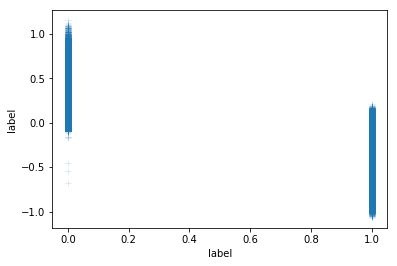

In [195]:
# resident plot
sns.scatterplot(x=y_train, y=(prediction2-y_train),alpha=0.2,marker="+")

In [196]:
X_train=pd.DataFrame(X_train)

In [197]:
X_train['label']=y_train

In [198]:
X_train['residual']=-prediction2+y_train

In [199]:
X_train_1=X_train[X_train['label']==1]

In [200]:
X_train_1['residual'].describe()

count    45234.000000
mean         0.423955
std          0.292495
min         -0.214423
25%          0.180861
50%          0.422670
75%          0.664359
max          1.069677
Name: residual, dtype: float64

In [201]:
len(X_train_1[(X_train_1['residual']>(0.423955-3*0.292495)) \
              & (X_train_1['residual']<(0.423955+3*0.292495))])

45234

In [202]:
X_train_0=X_train[X_train['label']==0]

In [203]:
X_train_0['residual'].describe()

count    108250.000000
mean         -0.177157
std           0.186841
min          -1.150918
25%          -0.260452
50%          -0.121633
75%          -0.040836
max           0.679148
Name: residual, dtype: float64

In [204]:
len(X_train_0[(X_train_0['residual']>(-0.177157-3*0.186841)) \
              & (X_train_0['residual']<(-0.177157+3*0.186841))])

106380

In [205]:
# emmmmm其实label为0的时候outlier更多一些，可以把这些outlier去掉

In [206]:
train_0=X_train_0[(X_train_0['residual']>(-0.177157-3*0.186841)) \
              & (X_train_0['residual']<(-0.177157+3*0.186841))]

In [207]:
train_1=X_train_1[(X_train_1['residual']>(0.423955-3*0.292495)) \
              & (X_train_1['residual']<(0.423955+3*0.292495))]

In [208]:
X_trian_all=pd.concat([train_0,train_1], sort=False)

In [209]:
y_train=X_trian_all['label']
X_train=X_trian_all.drop(['residual','label'],axis=1)

In [210]:
ridge3=Ridge()
ridge3.fit(X_train,y_train)
test_predict_3=ridge3.predict(X_test)
train_predict_3=ridge3.predict(X_train)

In [211]:
roc_auc_score(y_train,train_predict_3)

0.8837726679365105

In [212]:
roc_auc_score(y_test,test_predict_3)

0.8723118287278117

In [213]:
ridgeclassifier3=RidgeClassifier()
ridgeclassifier3.fit(X_train,y_train)
train_predict_3_=ridgeclassifier3.predict(X_train)
test_predict_3_=ridgeclassifier3.predict(X_test)

In [214]:
print(metrics.classification_report(y_train, train_predict_3_))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89    106380
         1.0       0.80      0.60      0.68     45234

   micro avg       0.83      0.83      0.83    151614
   macro avg       0.82      0.77      0.79    151614
weighted avg       0.83      0.83      0.83    151614



In [215]:
print(metrics.classification_report(y_test, test_predict_3_))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     27008
         1.0       0.76      0.59      0.67     11363

   micro avg       0.82      0.82      0.82     38371
   macro avg       0.80      0.76      0.77     38371
weighted avg       0.82      0.82      0.82     38371



### Oversample

In [166]:
from sklearn.utils import resample

In [167]:
X_train['label']=y_train
bag = X_train[X_train['label']==1]
boot = resample(bag, replace=True, n_samples=int(len(X_train[X_train['label']==0])*0.5), random_state=1)
X_train=pd.concat([boot,X_train],sort=False)

In [168]:
y_train=X_train['label']
X_train=X_train.drop(['label'],axis=1)

### getBestParams

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
parameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100 ,1000]}

In [218]:
ridge3=RidgeClassifier()
gs = GridSearchCV(ridge3, parameters, scoring='roc_auc', cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [219]:
gs.cv_results_['mean_test_score']

array([0.8834669 , 0.88346687, 0.88347038, 0.88348529, 0.88349357,
       0.8834436 , 0.88327283])

In [220]:
parameters = {'alpha':[1, 2, 3, 4, 5, 6 ,7, 8, 9]}
ridge3=RidgeClassifier()
gs = GridSearchCV(ridge3, parameters, scoring='roc_auc', cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [221]:
gs.cv_results_['mean_test_score']

array([0.88348529, 0.88348993, 0.88349314, 0.88349302, 0.88349447,
       0.88349463, 0.88349481, 0.88349505, 0.88349451])

In [222]:
ridge4=RidgeClassifier(alpha=8)
ridge4.fit(X_train,y_train)

RidgeClassifier(alpha=8, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [223]:
test_predict_5=ridge4.predict(X_test)
train_predict_5=ridge4.predict(X_train)

In [224]:
print(metrics.classification_report(y_train, train_predict_5))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89    106380
         1.0       0.80      0.60      0.68     45234

   micro avg       0.83      0.83      0.83    151614
   macro avg       0.82      0.77      0.79    151614
weighted avg       0.83      0.83      0.83    151614



In [225]:
print(metrics.classification_report(y_test, test_predict_5))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     27008
         1.0       0.76      0.59      0.67     11363

   micro avg       0.82      0.82      0.82     38371
   macro avg       0.80      0.76      0.77     38371
weighted avg       0.82      0.82      0.82     38371



In [226]:
ridge3=Ridge()
ridge3.fit(X_train,y_train)
test_predict_3=ridge3.predict(X_test)
train_predict_3=ridge3.predict(X_train)

没有什么变化，而且oversample好像准确率都降了。。。尼玛

In [227]:
roc_auc_score(y_train,train_predict_3)

0.8837726679365105

In [228]:
pd.DataFrame(train_predict_3).to_csv('ridge_train.csv',index=False)

In [229]:
roc_auc_score(y_test,test_predict_3)

0.8723118287278117

In [230]:
pd.DataFrame(test_predict_3).to_csv('ridge_test.csv',index=False)